In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pythermalcomfort.models as pm

In [124]:
# import the csv file: 'Chinese Thermal Comfort Dataset Heating Season_tsv.csv' in the current folder
df = pd.read_csv('CN_DB.csv')
df.head()

,suject_id,timestamp,season,city,climate,building_type,heating_type,gender,age,ht,...,met,ta,rh,vel,tg,top,tr,t_out_min,t_out_monthly,latitude
0,1,1/30/19 10:35,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,18-30,170.0,...,1.0,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62
1,2,1/30/19 10:42,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,41-50,168.0,...,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62
2,3,1/30/19 10:45,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,41-50,170.0,...,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62
3,4,1/30/19 10:47,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,178.0,...,0.9,21.5,32.0,0.0,20.9,20.8,20.9,-7.28,0.4,36.62
4,5,1/31/19 20:20,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,174.0,...,0.9,20.9,33.0,0.0,19.8,20.0,19.8,-7.28,0.4,36.62


In [125]:
df.columns

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'heating_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out_min', 't_out_monthly', 'latitude'],
      dtype='object')

In [126]:
# group by city, using mean values
df_city = df.groupby('city').agg(
    records=('city', 'size'),
    thermal_sensation=('thermal_sensation', 'mean'),
    thermal_comfort=('thermal_comfort', 'mean'),
    thermal_acceptability=('thermal_acceptability', 'mean'),
    ta=('ta', 'mean'),
    top=('top', 'mean'),
    clo=('clo', 'mean'),
    tout=('t_out_monthly', 'mean'),
    latitude=('latitude', 'mean')
).reset_index()

In [127]:
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,tout,latitude
0,Baotou,303,0.016502,1.465347,0.345183,19.766997,19.277228,0.341782,-8.600000,40.65
1,Beijing,651,-0.027957,1.569800,0.320480,22.948541,22.066052,0.920568,5.805036,39.90
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,NaN,26.08
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,NaN,26.64
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,NaN,26.10
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,16.710933,23.13
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,NaN,18.25
7,HebeiHandan,26,-0.384615,1.192308,0.853846,19.576923,19.300000,1.447692,3.176923,36.62
8,HeilongjiangHarbin,3552,0.293300,1.623226,0.749831,23.085107,22.707995,0.923361,-7.171811,45.75
9,HenanJiaozuo,888,-0.255631,1.388514,NaN,16.798874,16.798874,1.188874,NaN,35.24


## Indoor temperture distribution

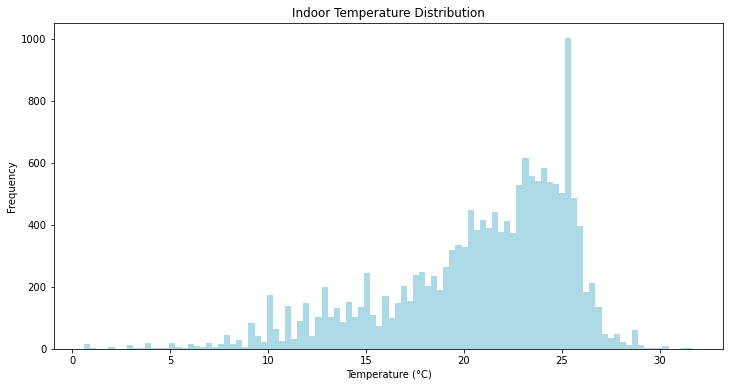

In [128]:
# plot the indoor temperature distribution
plt.figure(figsize=(12, 6))
plt.hist(df['ta'], bins=100, color='lightblue')
plt.title('Indoor Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [129]:
# acesending the df by latitude
df_city = df_city.sort_values('latitude')
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,tout,latitude
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,NaN,18.25
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,16.710933,23.13
32,YunnanKunming,415,-1.154217,1.424242,0.687879,13.617108,13.617108,0.647133,NaN,24.87
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,NaN,26.08
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,NaN,26.10
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,NaN,26.64
18,HunanHengyang,1,-1.000000,2.000000,-0.100000,16.900000,16.900000,0.660000,NaN,26.89
17,HunanChangsha,1108,-0.396029,2.816697,0.414621,17.222563,17.413267,0.947500,NaN,28.23
29,SichuanZigong,23,-0.217391,1.608696,0.643478,11.026087,11.026087,1.586522,NaN,29.34
20,Lhasa,355,-1.095775,NaN,NaN,10.640845,10.640845,1.253380,NaN,29.65


In [130]:
df.columns

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'heating_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out_min', 't_out_monthly', 'latitude'],
      dtype='object')

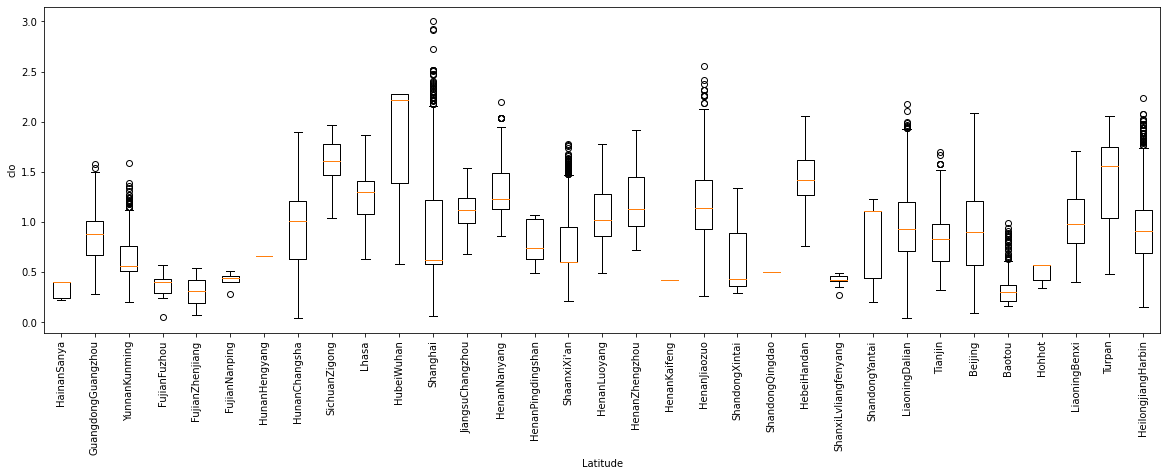

In [138]:
# box plot the x distribution by city, show latitude as x-axis
x = 'clo'
plt.figure(figsize=(20, 6))
plt.boxplot([df[df['city'] == city][x] for city in df_city['city']], labels=df_city['city'])
# limit the y-axis to 10-30
# plt.ylim(10, 30)
plt.xlabel('Latitude')
plt.ylabel(x)
plt.xticks(rotation=90) # Rotate x-axis labels by 45 degrees
plt.show()

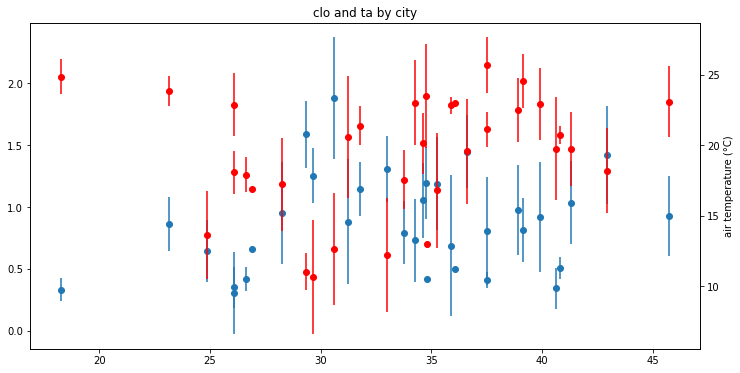

In [143]:
# calcualte the mean of the SUN variable for each city
df_city['x_mean'] = [df[df['city'] == city][x].mean() for city in df_city['city']]
# calcualte the standard deviation of the SUN variable for each city
df_city['x_var'] = [df[df['city'] == city][x].std() for city in df_city['city']]
# scatter plot the x_mean against latitude, and add error bars using x_var
plt.figure(figsize=(12, 6))
plt.errorbar(df_city['latitude'], df_city['x_mean'], yerr=df_city['x_var'], fmt='o')

# calcualte the mean of the SUN variable for each city
df_city['ta_mean'] = [df[df['city'] == city]["ta"].mean() for city in df_city['city']]
# calcualte the standard deviation of the SUN variable for each city
df_city['ta_var'] = [df[df['city'] == city]["ta"].std() for city in df_city['city']]
# scatter plot the ta_mean against latitude, and add error bars using ta_var in red on the right y-axis
plt.twinx()
plt.errorbar(df_city['latitude'], df_city['ta_mean'], yerr=df_city['ta_var'], fmt='ro')
plt.xlabel('Latitude')
plt.ylabel('air temperature (°C)')
plt.title('clo and ta by city')
plt.show()



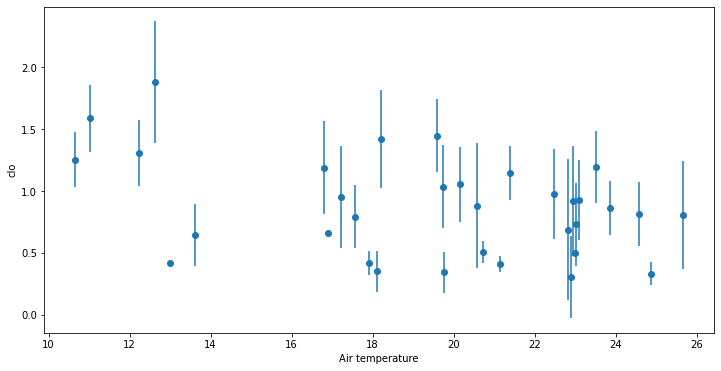

In [140]:
# calcualte the mean of the SUN variable for each city
df_city['x_mean'] = [df[df['city'] == city][x].mean() for city in df_city['city']]
# calcualte the standard deviation of the SUN variable for each city
df_city['x_var'] = [df[df['city'] == city][x].std() for city in df_city['city']]
# scatter plot the x_mean against latitude, and add error bars using x_var
plt.figure(figsize=(12, 6))
plt.errorbar(df_city['ta'], df_city['x_mean'], yerr=df_city['x_var'], fmt='o')
plt.xlabel('Air temperature')
plt.ylabel(x)
plt.show()

conclusion of vairales worth to explore:

clo: up to wuhan, increase to 2, then drop to 0.5 at Xi'an </br>
SET cannot be calcualted when air temperature is less than 10C


## Comfort Vote

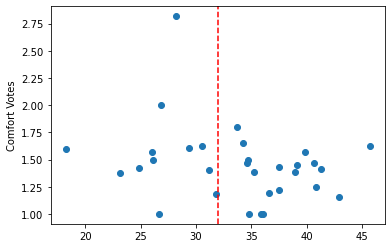

In [40]:
# plot the scatter plot of comfort votes against latitude, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_comfort']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Comfort Votes')
plt.show()

## Acceptability Vote

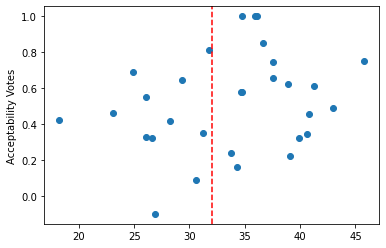

In [41]:
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_acceptability']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Acceptability Votes')
plt.show()
